In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### I. First look at the data
The data contains information about 30k power stations in the world. Key features include name, geo location, country, capacity, fuel type, generation.

In [2]:
df=pd.read_csv('global_power_plant_database.csv')
df.head()

country country_long                                               name  \
0     AFG  Afghanistan       Kajaki Hydroelectric Power Plant Afghanistan   
1     AFG  Afghanistan      Mahipar Hydroelectric Power Plant Afghanistan   
2     AFG  Afghanistan   Naghlu Dam Hydroelectric Power Plant Afghanistan   
3     AFG  Afghanistan  Nangarhar (Darunta) Hydroelectric Power Plant ...   
4     AFG  Afghanistan            Northwest Kabul Power Plant Afghanistan   

      gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  GEODB0040538        33.00   32.3220    65.1190        Hydro         NaN   
1  GEODB0040541        66.00   34.5560    69.4787        Hydro         NaN   
2  GEODB0040534       100.00   34.6410    69.7170        Hydro         NaN   
3  GEODB0040536        11.55   34.4847    70.3633        Hydro         NaN   
4  GEODB0040540        42.00   34.5638    69.1134          Gas         NaN   

  other_fuel2  ...                                 url  geolocation_source  \
0         NaN  ...  http://globalenergyobservatory.org               GEODB   
1         NaN  ...  http://globalenergyobservatory.org               GEODB   
2         NaN  ...  http://globalenergyobservatory.org               GEODB   
3         NaN  ...  http://globalenergyobservatory.org               GEODB   
4         NaN  ...  http://globalenergyobservatory.org               GEODB   

   wepp_id year_of_capacity_data generation_gwh_2013 generation_gwh_2014  \
0  1009793                2017.0                 NaN                 NaN   
1  1009795                2017.0                 NaN                 NaN   
2  1009797                2017.0                 NaN                 NaN   
3  1009787                2017.0                 NaN                 NaN   
4      NaN                2017.0                 NaN                 NaN   

  generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                 NaN                  NaN                  NaN   
1                 NaN                  NaN                  NaN   
2                 NaN                  NaN                  NaN   
3                 NaN                  NaN                  NaN   
4                 NaN                  NaN                  NaN   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 24 columns]

In [3]:
df.shape

(29910, 24)

In [4]:
df.nunique()

country                       164
country_long                  164
name                        29538
gppd_idnr                   29910
capacity_mw                  5558
latitude                    27606
longitude                   28427
primary_fuel                   15
other_fuel1                    12
other_fuel2                    11
other_fuel3                     7
commissioning_year           2028
owner                        9565
source                        865
url                          4869
geolocation_source             27
wepp_id                     15399
year_of_capacity_data          10
generation_gwh_2013          5970
generation_gwh_2014          6310
generation_gwh_2015          6906
generation_gwh_2016          7439
generation_gwh_2017          8122
estimated_generation_gwh    11784
dtype: int64

In [5]:
df.isna().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     0
latitude                        0
longitude                       0
primary_fuel                    0
other_fuel1                 27947
other_fuel2                 29607
other_fuel3                 29806
commissioning_year          13607
owner                       10379
source                         15
url                            18
geolocation_source            419
wepp_id                     13529
year_of_capacity_data       16167
generation_gwh_2013         22914
generation_gwh_2014         22470
generation_gwh_2015         21766
generation_gwh_2016         20939
generation_gwh_2017         20697
estimated_generation_gwh     8119
dtype: int64

The top countries by number of power stations.

In [6]:
df_country=df.groupby(['country_long']).size().sort_values(0, ascending=False).reset_index()
df_country.head()

country_long     0
0  United States of America  8686
1                     China  3041
2            United Kingdom  2536
3                    Brazil  2340
4                    France  2017

The top countries by number of power stations and primary fuel type.

In [7]:
df_country_fuel=df.groupby(['country_long','primary_fuel']).size().sort_values(0, ascending=False).reset_index()
df_country_fuel.head()

country_long primary_fuel     0
0  United States of America        Solar  2290
1  United States of America          Gas  1741
2  United States of America        Hydro  1457
3            United Kingdom        Solar  1092
4  United States of America         Wind  1043

Power station counts by fuel type.

In [8]:
df2=df.fillna('0')
df2_fuel=df2.groupby(['primary_fuel','other_fuel1','other_fuel2','other_fuel3']).size().sort_values(0, ascending=False).reset_index()
df2_fuel.head()

primary_fuel other_fuel1 other_fuel2 other_fuel3     0
0        Hydro           0           0           0  7152
1        Solar           0           0           0  5902
2         Wind           0           0           0  5179
3          Gas           0           0           0  2985
4          Oil           0           0           0  2085

In [15]:
# Rows without any missing data in generation column.
df2[(df2['generation_gwh_2013']!='0')&(df2['generation_gwh_2014']!='0')&(df2['generation_gwh_2015']!='0')&(df2['generation_gwh_2016']!='0')&(df2['generation_gwh_2017']!='0')].shape

(6817, 24)

In [16]:
# What are those countries.
df2[(df2['generation_gwh_2013']!='0')&(df2['generation_gwh_2014']!='0')&(df2['generation_gwh_2015']!='0')&(df2['generation_gwh_2016']!='0')&(df2['generation_gwh_2017']!='0')]['country_long'].value_counts()

United States of America    6244
India                        372
Australia                    201
Name: country_long, dtype: int64

In [17]:
# Top countries with missing generation data
df2[(df2['generation_gwh_2013']=='0')&(df2['generation_gwh_2014']=='0')&(df2['generation_gwh_2015']=='0')&(df2['generation_gwh_2016']=='0')&(df2['generation_gwh_2017']=='0')]['country_long'].value_counts()

China             3041
United Kingdom    2536
Brazil            2340
France            2017
Canada            1154
                  ... 
Western Sahara       1
Lesotho              1
Guinea-Bissau        1
Djibouti             1
Kenya                1
Name: country_long, Length: 162, dtype: int64

In [18]:
# Number of countries that has at least some data on generation.
df2[(df2['generation_gwh_2013']!='0')|(df2['generation_gwh_2014']!='0')|(df2['generation_gwh_2015']!='0')|(df2['generation_gwh_2016']!='0')|(df2['generation_gwh_2017']!='0')].shape

(10023, 24)

In [19]:
df2[(df2['generation_gwh_2013']!='0')|(df2['generation_gwh_2014']!='0')|(df2['generation_gwh_2015']!='0')|(df2['generation_gwh_2016']!='0')|(df2['generation_gwh_2017']!='0')].head()

country country_long              name   gppd_idnr  capacity_mw  latitude  \
303     AUS    Australia  Albany Wind Farm  AUS0000065         21.6  -35.0641   
305     AUS    Australia          Angaston  AUS0000232         50.0  -34.5034   
306     AUS    Australia          Anglesea  AUS0000114        165.0  -38.3861   
307     AUS    Australia      Appin (Mine)  AUS0000264         55.6  -34.2082   
309     AUS    Australia             Awaba  AUS0000049          1.1  -33.0250   

     longitude primary_fuel other_fuel1 other_fuel2  ...  \
303   117.7977         Wind           0           0  ...   
305   139.0246          Oil           0           0  ...   
306   144.1828         Coal           0           0  ...   
307   150.7722          Gas           0           0  ...   
309   151.5497        Waste           0           0  ...   

                                                   url  \
303  http://services.ga.gov.au/site_3/rest/services...   
305  http://services.ga.gov.au/site_3/rest/services...   
306  http://services.ga.gov.au/site_3/rest/services...   
307  http://services.ga.gov.au/site_3/rest/services...   
309  http://services.ga.gov.au/site_3/rest/services...   

                                    geolocation_source  wepp_id  \
303  Australian Renewable Energy Mapping Infrastruc...  1049129   
305  Australian Renewable Energy Mapping Infrastruc...  1065303   
306  Australian Renewable Energy Mapping Infrastruc...  1069504   
307  Australian Renewable Energy Mapping Infrastruc...  1011059   
309  Australian Renewable Energy Mapping Infrastruc...  1088658   

    year_of_capacity_data generation_gwh_2013 generation_gwh_2014  \
303                     0             89.5953             102.643   
305                     0                   0                   0   
306                     0             1095.68             1239.96   
307                     0             204.804             238.294   
309                     0             7.65528             8.33861   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
303             96.5556             95.8728             85.9003   
305             1.65306             5.30083             7.64972   
306             1260.26              167.88                   0   
307             163.584             158.933             64.5347   
309              9.1725                8.83             8.08556   

    estimated_generation_gwh  
303                        0  
305                  526.453  
306                        0  
307                        0  
309                        0  

[5 rows x 24 columns]

### II. EDA

#### II.a Group primary fuel into renewable and non-renewable

In [20]:
# Unique fuel types
df2['primary_fuel'].unique()

array(['Hydro', 'Gas', 'Other', 'Oil', 'Wind', 'Nuclear', 'Coal', 'Solar',
       'Waste', 'Biomass', 'Wave and Tidal', 'Petcoke', 'Geothermal',
       'Cogeneration', 'Storage'], dtype=object)

In [21]:
renewable = ['Hydro', 'Wind', 'Nuclear', 'Solar', 'Waste', 'Biomass', 'Wave and Tidal', 'Geothermal']
non_renewable = ['Gas', 'Oil', 'Coal', 'Petcoke']
other = ['Other', 'Cogeneration', 'Storage']

In [22]:
def fuel_type(fuel):
    if fuel in renewable:
        type = 'renewable'
    elif fuel in non_renewable:
        type = 'non_renewable'
    elif fuel in other: 
        type = 'other'
    else: type = 0
    return type

In [23]:
df2['primary_fuel_type'] = df['primary_fuel'].map(lambda x: fuel_type(x))
df2['2nd_fuel_type'] = df['other_fuel1'].map(lambda x: fuel_type(x))
df2['3rd_fuel_type'] = df['other_fuel2'].map(lambda x: fuel_type(x))
df2['4th_fuel_type'] = df['other_fuel3'].map(lambda x: fuel_type(x))

In [24]:
df2['primary_fuel_type'].value_counts()

renewable        21152
non_renewable     8615
other              143
Name: primary_fuel_type, dtype: int64

In [25]:
print(df2['2nd_fuel_type'].value_counts(),'\n\n',df2['3rd_fuel_type'].value_counts(),'\n\n',df2['4th_fuel_type'].value_counts())

0                27947
non_renewable     1694
renewable          201
other               68
Name: 2nd_fuel_type, dtype: int64 

 0                29607
non_renewable      193
renewable           69
other               41
Name: 3rd_fuel_type, dtype: int64 

 0                29806
non_renewable       53
renewable           27
other               24
Name: 4th_fuel_type, dtype: int64


In [29]:
# data for power plants that has no missing data from 2013 to 2017
pp = df2[(df2['generation_gwh_2013']!='0')|(df2['generation_gwh_2014']!='0')|(df2['generation_gwh_2015']!='0')|(df2['generation_gwh_2016']!='0')|(df2['generation_gwh_2017']!='0')]

In [27]:
data = [
    go.Bar(
        y=df2['primary_fuel'].value_counts().keys(), 
        x=df2['primary_fuel'].value_counts(),
        orientation='h'
    )]

layout = go.Layout(
    height=500,
    title='Power plants primary fuel counts',
    hovermode='closest',
    xaxis=dict(title='Fuels', ticklen=5, zeroline=False, gridwidth=2, domain=[0.1, 1]),
    yaxis=dict(title='', ticklen=5, gridwidth=2),
    showlegend=False
)

fig = go.Figure(data=data, layout=layout)
fig.show()

Bear in mind, many countries with great number of power plants have no data between 2013 and 2017, such as China and UK. So caution is needed as to how to interprete this graph. </n>
As we can see above, for those countries that have data, the numbers of renewable fuel power plants are significantly more than non-renewable counterparts. Top ones being hydro, solar and wind.

In [30]:
colors = ['lightslategray',] * 3
colors[0] = 'green'
data = [
    go.Bar(
        y=df2['primary_fuel_type'].value_counts().keys(), 
        x=df2['primary_fuel_type'].value_counts(),
        orientation='h',
        marker_color=colors
    )]

layout = go.Layout(
    height=500,
    title='Power plants primary fuel counts',
    hovermode='closest',
    xaxis=dict(title='Fuels', ticklen=5, zeroline=False, gridwidth=2, domain=[0.1, 1]),
    yaxis=dict(title='', ticklen=5, gridwidth=2),
    showlegend=False
)

fig = go.Figure(data=data, layout=layout)
fig.show()

This graph demonstrates more clearly the differences in count.

### II.b Fuel source by capacity

In [31]:
data = [
    go.Bar(
        y=df2.groupby('primary_fuel')['capacity_mw'].mean().sort_values().keys(), 
        x=df2.groupby('primary_fuel')['capacity_mw'].mean().sort_values(),
        orientation='h'
    )]

layout = go.Layout(
    height=500,
    title='Power plants average capacity by primary fuel',
    hovermode='closest',
    xaxis=dict(title='Fuels', ticklen=5, zeroline=False, gridwidth=2, domain=[0.1, 1]),
    yaxis=dict(title='', ticklen=5, gridwidth=2),
    showlegend=False
)

fig = go.Figure(data=data, layout=layout)
fig.show()

Contrary to the numbers of power plants graph, fuel by capacity shows nuclear (clearly), coal and gas has the highest capacity per power plant.

In [32]:
data = [
    go.Bar(
        y=df2.groupby('primary_fuel')['capacity_mw'].sum().sort_values().keys(), 
        x=df2.groupby('primary_fuel')['capacity_mw'].sum().sort_values(),
        orientation='h'
    )]

layout = go.Layout(
    height=500,
    title='Power plants total capacity by primary fuel',
    hovermode='closest',
    xaxis=dict(title='Fuels', ticklen=5, zeroline=False, gridwidth=2, domain=[0.1, 1]),
    yaxis=dict(title='', ticklen=5, gridwidth=2),
    showlegend=False
)

fig = go.Figure(data=data, layout=layout)
fig.show()

However the total capacity shows coal and gas has significantly more than others, meaning for the countries we have data for, coal and gas are probably the main fuels for generation.

In [33]:
data = [
    go.Bar(
        y=df2[df2['primary_fuel_type']=='non_renewable']['country_long'].value_counts().head(20).keys(), 
        x=df2[df2['primary_fuel_type']=='non_renewable']['country_long'].value_counts().head(20),
        orientation='h',
    )]

layout = go.Layout(
    height=500,
    title='Dirtest countries I',
    hovermode='closest',
    xaxis=dict(title='Number of non-renewable power plants', ticklen=5, zeroline=False, gridwidth=2, domain=[0.1, 1]),
    yaxis=dict(title='', ticklen=5, gridwidth=2),
    showlegend=False
)

fig = go.Figure(data=data, layout=layout)
fig.show()

Amongst all countries, US has the biggest count of non-renewable fueled power plants, almost 3 times more than the second place China.

In [34]:
df2[df2['primary_fuel_type']=='non_renewable'].groupby('country_long')['capacity_mw'].sum().sort_values(ascending=False)

country_long
China                       1016821.500
United States of America     848560.400
India                        227282.931
Russia                       152893.910
Japan                        138995.950
                               ...     
Guinea-Bissau                    18.237
Malawi                           15.500
Central African Republic         14.364
Liberia                          13.300
Antarctica                        6.600
Name: capacity_mw, Length: 152, dtype: float64

In [35]:
data = [
    go.Bar(
        y=df2[df2['primary_fuel_type']=='non_renewable'].groupby('country_long')['capacity_mw'].sum().sort_values(ascending=False).head(20).keys(), 
        x=df2[df2['primary_fuel_type']=='non_renewable'].groupby('country_long')['capacity_mw'].sum().sort_values(ascending=False).head(20),
        orientation='h',
    )]

layout = go.Layout(
    height=500,
    title='Dirtest countries II',
    hovermode='closest',
    xaxis=dict(title='Total capacity of non-renewable power plants', ticklen=5, zeroline=False, gridwidth=2, domain=[0.1, 1]),
    yaxis=dict(title='', ticklen=5, gridwidth=2),
    showlegend=False
)

fig = go.Figure(data=data, layout=layout)
fig.show()

However, when it comes to total capacity, China overtakes US, meaning China has less number of non-renewable power plants. But each have much bigger capacity. Worryingly US and China are the biggest pollutor by far, which points to the key roles these two countries have in global green policies.

### II.c Generation over time

In [45]:
pp['generation_gwh_2013'] = pp['generation_gwh_2013'].astype('float')
pp['generation_gwh_2014'] = pp['generation_gwh_2014'].astype('float')
pp['generation_gwh_2015'] = pp['generation_gwh_2015'].astype('float')
pp['generation_gwh_2016'] = pp['generation_gwh_2016'].astype('float')
pp['generation_gwh_2017'] = pp['generation_gwh_2017'].astype('float')

In [46]:
generation_by_fuel = pp.groupby(['primary_fuel'])[['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']]

In [47]:
sum_by_fuel = pp.groupby(['primary_fuel'])[['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']].sum().reset_index()

In [48]:
sum_by_fuel.columns = ['primary_fuel', '2013', '2014', '2015', '2016', '2017']
sum_by_fuel.head()

primary_fuel          2013          2014          2015          2016  \
0       Biomass  2.282859e+04  2.255694e+04  2.548448e+04  2.964953e+04   
1          Coal  2.048616e+06  2.140350e+06  2.266787e+06  2.167368e+06   
2  Cogeneration  2.913223e+03  2.587310e+03  2.640661e+03  2.664063e+03   
3           Gas  1.156050e+06  1.243793e+06  1.429879e+06  1.286651e+06   
4    Geothermal  1.519041e+04  1.558952e+04  1.658552e+04  2.071171e+04   

           2017  
0  2.770584e+04  
1  2.243724e+06  
2  3.886347e+03  
3  1.379594e+06  
4  1.588210e+04

In [49]:
sum_by_fuel = pd.melt(sum_by_fuel, id_vars=['primary_fuel'], value_vars=['2013', '2014', '2015', '2016', '2017'], var_name='year', value_name='generation_gwh')

In [50]:
sum_by_fuel.head()

primary_fuel  year  generation_gwh
0       Biomass  2013    2.282859e+04
1          Coal  2013    2.048616e+06
2  Cogeneration  2013    2.913223e+03
3           Gas  2013    1.156050e+06
4    Geothermal  2013    1.519041e+04

In [51]:
fig = px.line(sum_by_fuel, x='year', y='generation_gwh', color='primary_fuel')
fig.show()

The trend is rather worrying for countries we have data for. Although wind powered plants have increased. The over all picture saw significant increases in coal and gas generation, while there is actually decline for some renewable plants such as hydro fueled.

In [52]:
generation_by_fuel_type = pp.groupby(['primary_fuel_type'])[['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']]

In [53]:
sum_by_fuel_type = generation_by_fuel_type.sum().reset_index()

In [54]:
sum_by_fuel_type.head()

primary_fuel_type  generation_gwh_2013  generation_gwh_2014  \
0     non_renewable         3.227861e+06         3.409271e+06   
1             other         7.222497e+03         5.255806e+03   
2         renewable         1.589536e+06         1.531884e+06   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  
0         3.718088e+06         3.473053e+06         3.650948e+06  
1         3.807115e+03         3.587229e+03         5.657952e+03  
2         1.687926e+06         1.759040e+06         1.682555e+06

In [55]:
sum_by_fuel_type.columns = ['primary_fuel_type', '2013', '2014', '2015', '2016', '2017']

In [56]:
sum_by_fuel_type = pd.melt(sum_by_fuel_type, id_vars=['primary_fuel_type'], value_vars=['2013', '2014', '2015', '2016', '2017'], var_name='year', value_name='generation_gwh')

In [57]:
sum_by_fuel_type.head()

primary_fuel_type  year  generation_gwh
0     non_renewable  2013    3.227861e+06
1             other  2013    7.222497e+03
2         renewable  2013    1.589536e+06
3     non_renewable  2014    3.409271e+06
4             other  2014    5.255806e+03

In [58]:
fig = px.line(sum_by_fuel_type, x='year', y='generation_gwh', color='primary_fuel_type')
fig.show()

An overall increase in generation for renewable and non-renewable, but non-renewable has increase a lot more.

#### Non-renewable generation increase outstrip renewable :(((

### II.d Geoplots

In [60]:
geo_pp = pp[['country', 'country_long', 'name', 'primary_fuel', 'primary_fuel_type', 'generation_gwh_2013', 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016','generation_gwh_2017' ]]

In [61]:
geo_pp.columns = ['country', 'country_long', 'name', 'primary_fuel', 'primary_fuel_type', '2013', '2014', '2015', '2016', '2017']

In [62]:
geo_pp.head()

country country_long              name primary_fuel primary_fuel_type  \
303     AUS    Australia  Albany Wind Farm         Wind         renewable   
305     AUS    Australia          Angaston          Oil     non_renewable   
306     AUS    Australia          Anglesea         Coal     non_renewable   
307     AUS    Australia      Appin (Mine)          Gas     non_renewable   
309     AUS    Australia             Awaba        Waste         renewable   

            2013         2014         2015        2016       2017  
303    89.595278   102.642778    96.555556   95.872778  85.900278  
305     0.000000     0.000000     1.653056    5.300833   7.649722  
306  1095.676944  1239.962778  1260.261111  167.880000   0.000000  
307   204.804444   238.294444   163.583611  158.933056  64.534722  
309     7.655278     8.338611     9.172500    8.830000   8.085556

In [63]:
geo_pp = pd.melt(geo_pp, id_vars=['country', 'country_long', 'name', 'primary_fuel', 'primary_fuel_type'], value_vars=['2013', '2014', '2015', '2016', '2017'], var_name='year', value_name='generation_gwh')

In [64]:
geo_pp.head()

country country_long              name primary_fuel primary_fuel_type  year  \
0     AUS    Australia  Albany Wind Farm         Wind         renewable  2013   
1     AUS    Australia          Angaston          Oil     non_renewable  2013   
2     AUS    Australia          Anglesea         Coal     non_renewable  2013   
3     AUS    Australia      Appin (Mine)          Gas     non_renewable  2013   
4     AUS    Australia             Awaba        Waste         renewable  2013   

   generation_gwh  
0       89.595278  
1        0.000000  
2     1095.676944  
3      204.804444  
4        7.655278

<AxesSubplot:ylabel='Frequency'>

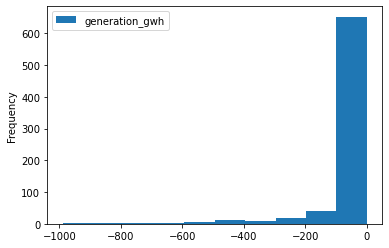

In [65]:
geo_pp[geo_pp['generation_gwh']<0].plot.hist()

In [66]:
index = geo_pp[geo_pp['generation_gwh']<0].index

In [67]:
# presume the data was a mistake, change to positive
geo_pp['generation_gwh'] = np.where(geo_pp['generation_gwh']<0, -geo_pp['generation_gwh'], geo_pp['generation_gwh'])

In [68]:
geo_pp_sum = geo_pp.groupby(['country', 'country_long', 'primary_fuel', 'year'])['generation_gwh'].sum()

In [69]:
geo_pp_sum.columns = ['country', 'country_long', 'primary_fuel', 'year', 'generation_gwh']
geo_pp_sum.head()

country  country_long  primary_fuel  year
AUS      Australia     Biomass       2013      1.521944
                                     2014     69.491389
                                     2015    288.470000
                                     2016    364.717500
                                     2017    406.858333
Name: generation_gwh, dtype: float64

In [70]:
geo_pp_sum = pd.DataFrame(geo_pp_sum)

In [71]:
geo_pp_sum.reset_index(inplace=True)
geo_pp_sum.head()

country country_long primary_fuel  year  generation_gwh
0     AUS    Australia      Biomass  2013        1.521944
1     AUS    Australia      Biomass  2014       69.491389
2     AUS    Australia      Biomass  2015      288.470000
3     AUS    Australia      Biomass  2016      364.717500
4     AUS    Australia      Biomass  2017      406.858333

In [72]:
fig = px.scatter_geo(geo_pp_sum, locations="country", color="primary_fuel",
                     hover_name="country_long", size="generation_gwh",
                     animation_frame="year",
                     projection="natural earth")
fig.show()

#### The generation data has too much missing data and not much change

#### Capacity geo plot

In [73]:
geo_cap = df2[['country', 'country_long', 'name', 'primary_fuel', 'primary_fuel_type', 'capacity_mw', 'latitude', 'longitude']]

In [74]:
geo_cap_sum = geo_cap.groupby(['country', 'country_long', 'primary_fuel'])['capacity_mw'].sum()
geo_cap_sum2 = geo_cap.groupby(['country', 'country_long', 'primary_fuel_type'])['capacity_mw'].sum()

In [75]:
geo_cap_sum = pd.DataFrame(geo_cap_sum).reset_index()
geo_cap_sum2 = pd.DataFrame(geo_cap_sum2).reset_index()

In [76]:
fig = px.scatter_geo(geo_cap_sum, locations="country", color="primary_fuel",
                     hover_name="country_long", size="capacity_mw",
                     projection="natural earth")
fig.show()

It's very clear Chins's major capacity lies in coal. So does India, and most of Asian countries. Whereas US and Russia is more natural gas. European capacity is more varied. Canada and South America has a lot of hydro power.

In [78]:
fig = px.scatter_geo(geo_cap_sum2, locations="country", color="primary_fuel_type",
                     hover_name="country_long", size="capacity_mw",
                     projection="natural earth")
fig.show()

When comparing non-renewable to renewable capacity, Asia, Africa, Eastern Europe and US are less clean, whereas Canada, South America, Western Europe have more renewable capacities.

In [82]:
fig = go.Figure()

colors = {'renewable': 'green', 'non_renewable': 'orange', 'other': 'grey'}
scale = geo_cap['capacity_mw'].max()

for i in ['renewable', 'non_renewable', 'other']:
    df_sub = geo_cap[geo_cap['primary_fuel_type']==i]
    fig.add_trace(go.Scattergeo(
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = df_sub['capacity_mw'],
        marker = dict(
            size = 80*df_sub['capacity_mw']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = i)
    )

    fig.update_layout(
        title_text = 'Power plants capacity by primary fuel type',
        showlegend = True,
    
        geo = dict(
            landcolor = 'rgb(217, 217, 217)',
            showcoastlines=True,
            showcountries=True,
            countrycolor='white'
        )
    )


fig.show()

The power capacity disparity is quite shocking, concentrating in China, India, US and Europe. There are encouraging signs that developing countries in South America have developed a predominantly green approach, whereas Africa is showing signs of a non-renewable future in oil/coal rich countries.